In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft 
import scipy as sp
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import freqz

In [2]:
data=np.loadtxt('00000002.txt')
name='02_19Sept'
tsimu=1       #tmesure en réalité 
Nrec=24

################################

ech=np.size(data)/Nrec
ech=int(ech)
dt=tsimu/ech
fmax=1/dt
fNy=fmax/2
df=1/tsimu

#data=np.reshape(data, np.size(data))
#data=np.reshape(data, (ech,Nrec))

np.shape(data)

print("ech, nombre de points du signal =",ech)
print("dt, pas de temps", dt)
print("fmax, fech =",fmax)
print("fNy=", fNy)
print("df, pas en fréquence=", df)

ech, nombre de points du signal = 4000
dt, pas de temps 0.00025
fmax, fech = 4000.0
fNy= 2000.0
df, pas en fréquence= 1.0


In [3]:
plt.figure(figsize=(13,3))
plt.plot(temps, data[:,9])
plt.ylim(-1.2,1.2)
plt.grid()
plt.ylabel("Recepteur 10")
plt.legend()

NameError: name 'temps' is not defined

<Figure size 936x216 with 0 Axes>

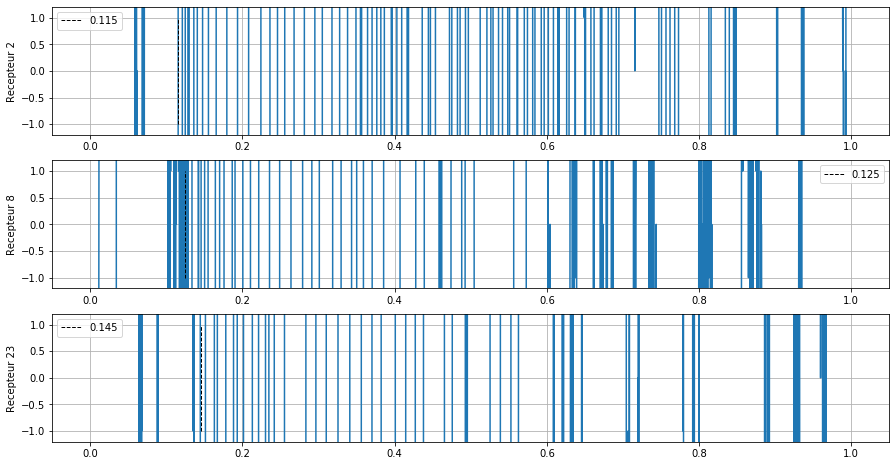

In [4]:
tmin=0+dt
tmax=tsimu+dt
temps=np.linspace(tmin,tmax,ech)

plt.figure(figsize=(15,8))
plt.subplot(311)
plt.plot(temps, data[:,1])
plt.ylim(-1.2,1.2)
plt.grid()
plt.plot([0.115, 0.115],[-1,1],  'k--', lw=1, label="0.115")
plt.legend()
plt.ylabel("Recepteur 2")

plt.subplot(312)
plt.plot(temps, data[:,9])
plt.ylim(-1.2,1.2)
plt.grid()
plt.ylabel("Recepteur 8")
plt.plot([0.125, 0.125],[-1,1],  'k--', lw=1, label="0.125")
plt.legend()


plt.subplot(313)
plt.plot(temps, data[:,22])
plt.ylim(-1.2,1.2)
plt.grid()
plt.ylabel("Recepteur 23")
plt.plot([0.145, 0.145],[-1,1],  'k--', lw=1, label="0.145")
plt.legend()

#plt.savefig('Vp_P0_02.png',bbox_inches='tight')

(4000, 24)


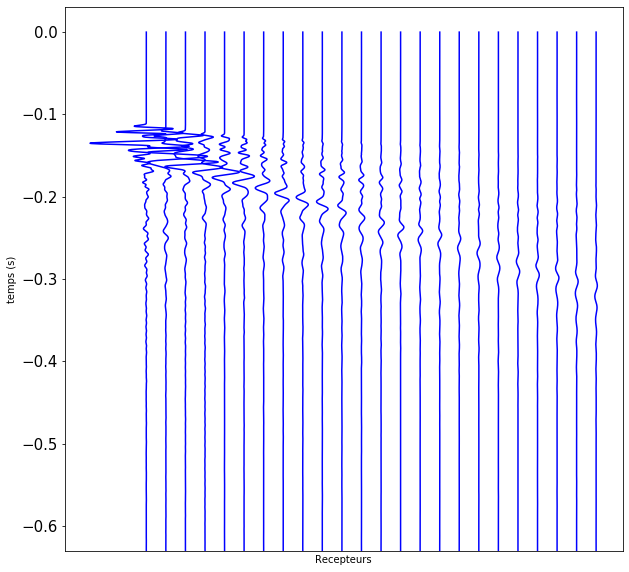

In [5]:
aux=np.max(np.abs(data))
vecteur=np.linspace(0,(aux/3)*Nrec,Nrec)

mat=np.ones((ech,1))*vecteur
print(np.shape(mat))
data_p=data+mat

plt.figure(figsize=(10,10))
plt.plot(data_p,-temps, 'b')
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;
plt.ylim(-0.63,0.03)
plt.tick_params(axis = 'both', labelsize =15)


figwave="wave.png"
namefigwave=name+figwave
plt.savefig(namefigwave,bbox_inches='tight')

In [6]:
recp=np.linspace(1,Nrec,Nrec)
freq=np.arange(0+df,fmax+(df/2),df)

print(np.shape(freq))

ntemps, nrecp = (Nrec, ech)
nrecp, ntemps = np.meshgrid(recp, temps)

nfreq, nrecp = (Nrec, ech)
nrecp, nfreq = np.meshgrid(recp, freq)

np.shape(nfreq)

(4000,)


(4000, 24)

(-100, 0)

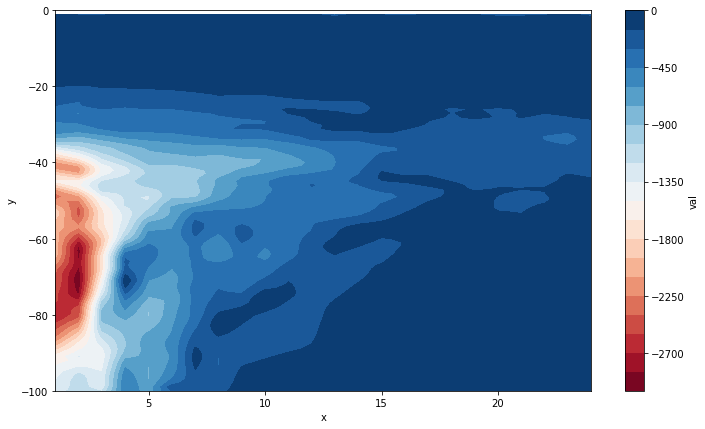

In [7]:
### spectre en fréquence du tir ###

size=(ech, Nrec)
specfx=np.zeros(size)

for i in range (Nrec):
    signal=data[:,i]
    t= temps
    tfd = fft(signal)
    N=len(signal)
    spectre = np.absolute(tfd)*2/N
    T=max(t)
    specfx[:,i]=spectre
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-100,0)
    

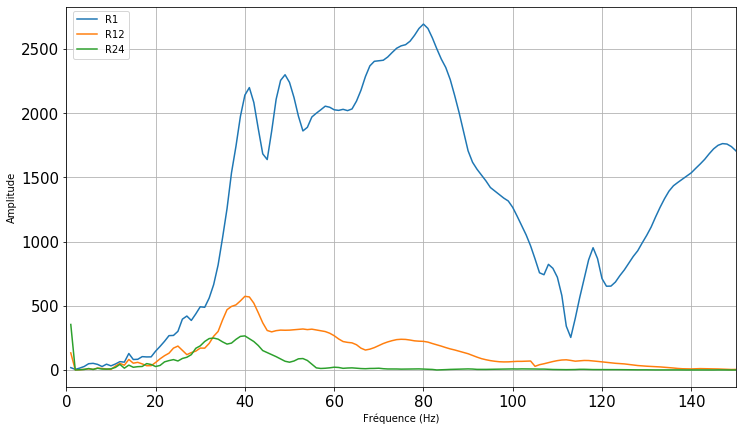

In [8]:
#figure comparaison 

plt.figure(figsize= (12,7))

plt.plot(freq,specfx[:,0], label="R1")
plt.plot(freq,specfx[:,11], label="R12")
plt.plot(freq,specfx[:,23], label="R24")

#plt.plot([mail_fmax, mail_fmax],[0,1],  'k--', lw=2, label="Fréquence limite du maillage")

plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,150)
plt.tick_params(axis = 'both', labelsize =15)
plt.grid()
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

figtransfil="_TF.png"
namefigtransfil=name+figtransfil
#plt.savefig(namefigtransfil,bbox_inches='tight')